In [1]:
import numpy as np
import pandas as pd

# ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

# We will display plots right inside Jupyter Notebook
%matplotlib inline
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible. Sometimes it can take longer to load.
# Use : %config InlineBackend.figure_format = 'png' in that case
%config InlineBackend.figure_format = 'svg'

In [2]:
df = pd.read_csv('Data/Expert_Opinions.csv')

In [3]:
df.shape

(7, 121)

In [4]:
df.head()

,Timestamp,Which mockup is a better Login screen design?,Why did you choose one over the other?,How would you rate the design in terms of usability? [Option #1],How would you rate the design in terms of usability? [Option #2],How would you rate the design in terms of completeness? [Option #1],How would you rate the design in terms of completeness? [Option #2],How would you rate the design in terms of familiarity? [Option #1],How would you rate the design in terms of familiarity? [Option #2],How would you rate the design in terms of attractiveness? [Option #1],...,How would you rate the design in terms of usability? [Option #1].6,How would you rate the design in terms of usability? [Option #2].3,How would you rate the design in terms of completeness? [Option #1].4,How would you rate the design in terms of completeness? [Option #2].4,How would you rate the design in terms of familiarity? [Option #1].4,How would you rate the design in terms of familiarity? [Option #2].4,How would you rate the design in terms of attractiveness? [Option #1].4,How would you rate the design in terms of attractiveness? [Option #2].4,How would you rate the design in terms of consistency? [Option #1].4,How would you rate the design in terms of consistency? [Option #2].5
0,6/5/2018 15:46:51,Option 2,I prefer darker backgrounds on average. Less e...,2,2,2,3,2,2,2,...,2,2,2,2,2,2,1,2,2,2
1,6/6/2018 23:55:51,Option 2,it has more details and is more user friendly ...,2,3,1,2,3,3,2,...,2,3,2,3,3,3,2,3,3,3
2,6/6/2018 23:58:30,Option 2,"This design has sign up, remember me features ...",3,3,2,3,3,3,3,...,2,2,2,2,3,3,3,2,3,2
3,6/7/2018 0:16:22,Option 2,"Completer design, more readable name",1,2,1,2,2,2,2,...,2,2,2,2,2,2,2,1,2,2
4,6/7/2018 2:07:42,Option 2,More interaction options,1,3,1,3,2,2,2,...,2,3,2,3,2,3,1,3,1,3


Each row represents an **Expert** entry and each column represents a **Participant** entry.

In [5]:
df.columns

Index(['Timestamp', 'Which mockup is a better Login screen design?',
       'Why did you choose one over the other?',
       'How would you rate the design in terms of usability? [Option #1]',
       'How would you rate the design in terms of usability? [Option #2]',
       'How would you rate the design in terms of completeness? [Option #1]',
       'How would you rate the design in terms of completeness? [Option #2]',
       'How would you rate the design in terms of familiarity? [Option #1]',
       'How would you rate the design in terms of familiarity? [Option #2]',
       'How would you rate the design in terms of attractiveness? [Option #1]',
       ...
       'How would you rate the design in terms of usability? [Option #1].6',
       'How would you rate the design in terms of usability? [Option  #2].3',
       'How would you rate the design in terms of completeness? [Option  #1].4',
       'How would you rate the design in terms of completeness? [Option  #2].4',
       'How wo

In [6]:
df = df.drop(['Timestamp'],axis=1) # deleting the timestamp column

In [7]:
df.shape

(7, 120)

So, we see that there are 120 columns. This is because there are 10 participants and 12 responses for each participants. The breakdown of questions are:
- 1 question for choosing the better mockup.
- 1 question for filling in the comments.
- 5 questions with 2 subparts (one for each option).

#### Creating meaningful columns

In [8]:
# Setting the constants
numQues = 5
colsPerParticipant = 2*numQues + 2
numParticipants = int(len(df.columns)/colsPerParticipant)

In [9]:
ques = ['Q' + str(i) for i in range(1,numQues+1)]
part = ['P'+str(i) for i in range(1,numParticipants+1)]
opt = ['O1','O2']
design = [part[i]+'D' for i in range(len(part))]
comments = [part[i]+'C' for i in range(len(part))] 

In [10]:
tmp = [part[j] + ques[i] for j in range(len(part)) for i in range(len(ques))]
tmp = [tmp[i] + opt[j] for i in range(len(tmp)) for j in range(len(opt))]

In [11]:
final = []
k = 0
for i in range(len(tmp)):
    if i%10 == 0:
        final.append(design[k])
        final.append(comments[k])
        k += 1
    final.append(tmp[i])

In [12]:
(final[12:24])

['P2D',
 'P2C',
 'P2Q1O1',
 'P2Q1O2',
 'P2Q2O1',
 'P2Q2O2',
 'P2Q3O1',
 'P2Q3O2',
 'P2Q4O1',
 'P2Q4O2',
 'P2Q5O1',
 'P2Q5O2']

Above are the values collected for each participant. Each participant will have 12 questions and 1 column for each question. Hence, we have 120 columns for 10 participants. Here, the column naming convention is such:
* P1D: For participant1 what is the design preference
* P1C: For participant1 what are the comments
* P1Q1O1: For participant1 question1 option1 what is the rating given
* P1Q1O2: For participant1 question1 option2 what is the rating given

In [13]:
df.columns = final

In [14]:
df.iloc[:5,:20]

,P1D,P1C,P1Q1O1,P1Q1O2,P1Q2O1,P1Q2O2,P1Q3O1,P1Q3O2,P1Q4O1,P1Q4O2,P1Q5O1,P1Q5O2,P2D,P2C,P2Q1O1,P2Q1O2,P2Q2O1,P2Q2O2,P2Q3O1,P2Q3O2
0,Option 2,I prefer darker backgrounds on average. Less e...,2,2,2,3,2,2,2,2,2,2,Option 2,More consistent color palette and hierarchy e....,2,2,2,2,2,2
1,Option 2,it has more details and is more user friendly ...,2,3,1,2,3,3,2,3,2,2,Option 1,More details,3,2,1,2,2,2
2,Option 2,"This design has sign up, remember me features ...",3,3,2,3,3,3,3,1,3,2,Option 1,It is a more complete design in the sense that...,3,2,3,2,3,3
3,Option 2,"Completer design, more readable name",1,2,1,2,2,2,2,1,2,2,Option 1,"A Completer UI, Also having signing in options...",3,1,3,1,2,1
4,Option 2,More interaction options,1,3,1,3,2,2,2,2,3,2,Option 1,looks more complete. logo is misplaced in app-2,3,1,2,1,3,1


In [15]:
optionsdict = {'Option 1':1,'Option 2':2}
for c in df.columns:
    if c[-1] == 'D': df = df.replace({c:optionsdict})
# replace the columns with design choices (ends with 'D') 
# between option 1 & 2 with numeric values (makes understanding easy)

In [16]:
df.iloc[:5,:20]

,P1D,P1C,P1Q1O1,P1Q1O2,P1Q2O1,P1Q2O2,P1Q3O1,P1Q3O2,P1Q4O1,P1Q4O2,P1Q5O1,P1Q5O2,P2D,P2C,P2Q1O1,P2Q1O2,P2Q2O1,P2Q2O2,P2Q3O1,P2Q3O2
0,2,I prefer darker backgrounds on average. Less e...,2,2,2,3,2,2,2,2,2,2,2,More consistent color palette and hierarchy e....,2,2,2,2,2,2
1,2,it has more details and is more user friendly ...,2,3,1,2,3,3,2,3,2,2,1,More details,3,2,1,2,2,2
2,2,"This design has sign up, remember me features ...",3,3,2,3,3,3,3,1,3,2,1,It is a more complete design in the sense that...,3,2,3,2,3,3
3,2,"Completer design, more readable name",1,2,1,2,2,2,2,1,2,2,1,"A Completer UI, Also having signing in options...",3,1,3,1,2,1
4,2,More interaction options,1,3,1,3,2,2,2,2,3,2,1,looks more complete. logo is misplaced in app-2,3,1,2,1,3,1


In [17]:
# Read the mapping between design and assistance used. 
designmap = pd.read_csv('Data/Participant_Design_Map.csv')
[designmap] = designmap.values.T.tolist()

In [18]:
designmap

[0, 1, 0, 1, 0, 1, 0, 0, 1, 0]

#### Separate the designs with Assistant and designs without Assistant

In [19]:
with_assistant_cols = []
without_assistant_cols = []
k = 0
for c in df.columns:
    # Uncomment the lines below to add the cols which donot contain 'O' (the 'D' and 'C' cols)
    if 'O' not in c:
        ;
#         with_assistant_cols.append(c)
#         without_assistant_cols.append(c)
    # condition for design drawn with the assistant
    elif (c.endswith('1') and designmap[k] == 1)\
         or (c.endswith('2') and designmap[k] == 0):
        with_assistant_cols.append(c)
    # condition for design drawn without the assistant
    else:
        without_assistant_cols.append(c)
    
    if (df.columns.get_loc(c) + 1)%(colsPerParticipant) == 0: k += 1

In [20]:
wi_df = df[with_assistant_cols]
wo_df = df[without_assistant_cols]

- *wi_df* is the dataframe for designs drawn with the assistant 
- *wo_df* is the dataframe for designs drawn without the assistant

In [21]:
wi_df.describe()

,P1Q1O2,P1Q2O2,P1Q3O2,P1Q4O2,P1Q5O2,P2Q1O1,P2Q2O1,P2Q3O1,P2Q4O1,P2Q5O1,...,P9Q1O1,P9Q2O1,P9Q3O1,P9Q4O1,P9Q5O1,P10Q1O2,P10Q2O2,P10Q3O2,P10Q4O2,P10Q5O2
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,2.571429,2.714286,2.285714,1.857143,1.714286,2.714286,2.285714,2.571429,2.142857,2.000000,...,2.142857,2.428571,2.000000,1.714286,1.571429,2.571429,2.428571,2.714286,2.428571,2.571429
std,0.534522,0.487950,0.487950,0.690066,0.487950,0.487950,0.755929,0.534522,0.899735,0.816497,...,0.690066,0.786796,0.816497,0.755929,0.534522,0.534522,0.534522,0.487950,0.786796,0.534522
min,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000
25%,2.000000,2.500000,2.000000,1.500000,1.500000,2.500000,2.000000,2.000000,1.500000,1.500000,...,2.000000,2.000000,1.500000,1.000000,1.000000,2.000000,2.000000,2.500000,2.000000,2.000000
50%,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,...,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000
75%,3.000000,3.000000,2.500000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.500000,...,2.500000,3.000000,2.500000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000
max,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000


## Visualization

In [22]:
# Getting rid of the 'P*' and 'O*' substrings
wi_df.columns = [x[-4:-2] for x in wi_df.columns]
wo_df.columns = [x[-4:-2] for x in wo_df.columns]

In [23]:
wi_df.iloc[:5,:]

,Q1,Q2,Q3,Q4,Q5,Q1,Q2,Q3,Q4,Q5,...,Q1,Q2,Q3,Q4,Q5,Q1,Q2,Q3,Q4,Q5
0,2,3,2,2,2,2,2,2,2,1,...,1,1,2,1,1,2,2,2,2,2
1,3,2,3,3,2,3,1,2,3,2,...,2,3,3,3,2,3,3,3,3,3
2,3,3,3,1,2,3,3,3,1,2,...,2,2,1,1,1,2,2,3,2,2
3,2,2,2,1,2,3,3,2,1,1,...,2,2,1,1,1,2,2,2,1,2
4,3,3,2,2,2,3,2,3,2,2,...,3,3,2,2,2,3,3,3,3,3


In [24]:
wi_df.shape

(7, 50)

In [25]:
# Saving the dataframes to csv file to be used with for Participant Data Analysis
wi_df.to_csv('Data/wi_df.csv', index=False)
wo_df.to_csv('Data/wo_df.csv', index=False)

In [26]:
# Grouping across different participants for question
wi_df_grouped_mean = wi_df.groupby(wi_df.columns, axis=1).mean()
wo_df_grouped_mean = wo_df.groupby(wo_df.columns, axis=1).mean()
# Taking mean for each question
wo_df_mean = wo_df_grouped_mean.mean()
wi_df_mean = wi_df_grouped_mean.mean()
# Find the std deviation
wo_df_std = wo_df_grouped_mean.std()
wi_df_std = wi_df_grouped_mean.std()

In [27]:
# Similar to above, taking medians of median
wi_df_grouped_median = wi_df.groupby(wi_df.columns, axis=1).median()
wo_df_grouped_median = wo_df.groupby(wo_df.columns, axis=1).median()
wo_df_median = wo_df_grouped_median.median()
wi_df_median = wi_df_grouped_median.median()

In [28]:
ques_df_mean = pd.DataFrame([wo_df_mean, wi_df_mean]).T
ques_df_mean # col-0: Without the assistant, col-1: With the assistant

,0,1
Q1,1.814286,2.300000
Q2,1.942857,2.185714
Q3,2.200000,2.228571
Q4,1.900000,1.957143
Q5,2.185714,2.071429


In [29]:
ques_df_std = pd.DataFrame([wo_df_std, wi_df_std]).T
ques_df_std # col-0: Without the assistant, col-1: With the assistant

,0,1
Q1,0.241030,0.336650
Q2,0.214920,0.177281
Q3,0.378594,0.281154
Q4,0.191485,0.359894
Q5,0.195180,0.309377


In [30]:
ques_df_median = pd.DataFrame([wo_df_median, wi_df_median]).T
ques_df_median # col-0: Without the assistant, col-1: With the assistant

,0,1
Q1,2.0,3.0
Q2,2.0,2.0
Q3,2.0,2.5
Q4,2.0,2.0
Q5,2.5,2.0


In [31]:
def plot_ques_wise(df,ylabel,yerr,filename):
    labels = ['Usability','Completeness','Familiarity','Atractiveness','Consistency']
    df.plot(kind='bar',yerr=yerr)
    plt.legend(['Without Assistant','With Assistant'])
    plt.xticks(range(5), labels, rotation=15)
    plt.xlabel('Parameters')
    plt.ylabel(ylabel)
    plt.savefig(filename, bbox_inches='tight')

### TODO: Add labels on bar plots

In [34]:
ques_df_mean

,0,1
Q1,1.814286,2.300000
Q2,1.942857,2.185714
Q3,2.200000,2.228571
Q4,1.900000,1.957143
Q5,2.185714,2.071429


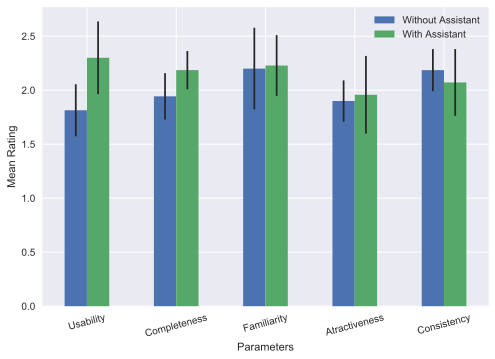

In [32]:
plot_ques_wise(ques_df_mean,'Mean Rating', ques_df_std, filename='plots/expert_mean.png')

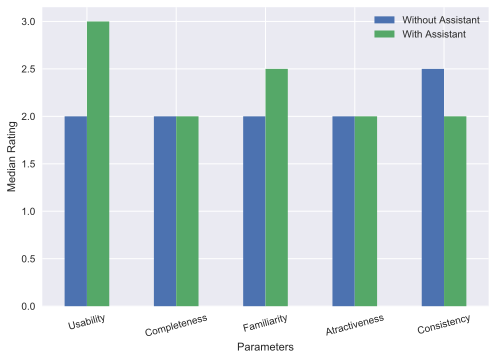

In [33]:
plot_ques_wise(ques_df_median, 'Median Rating', yerr=0, filename='plots/expert_median.png')

### What are the other kinds of plots that can be drawn from experts data?